In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [18]:
recastData = pd.read_pickle('limits_cms_top_20_001.pcl')
print(recastData['yDM (95% C.L.)'])

0      2.950021
1      2.573479
2      2.082872
3      2.229611
4      2.419522
5      2.573995
6      3.085947
7      3.503291
8      3.986631
9      4.823760
10     5.065106
11     5.626106
12     5.982518
13     6.817237
14     6.931323
15     7.626646
16     7.847878
17     8.479784
18     8.966364
19     9.551549
20     9.869303
21    10.264660
22    10.792629
23    11.241615
24    11.486168
25    12.097724
26    12.571451
27    12.929762
28    12.875608
29    13.426049
30    13.395310
31    14.282442
32    14.364907
33    13.994339
34    14.541426
35    14.515597
36    15.620682
37    15.582640
38    15.707337
39    16.561674
40    16.610069
41    17.310516
42    17.458320
43    17.722034
44    18.093897
45    18.638237
46    19.131686
47    19.451177
48    19.971527
49    20.630331
50    21.383723
51    21.475782
52    21.629722
Name: yDM (95% C.L.), dtype: float64


### Plot limit on yDM

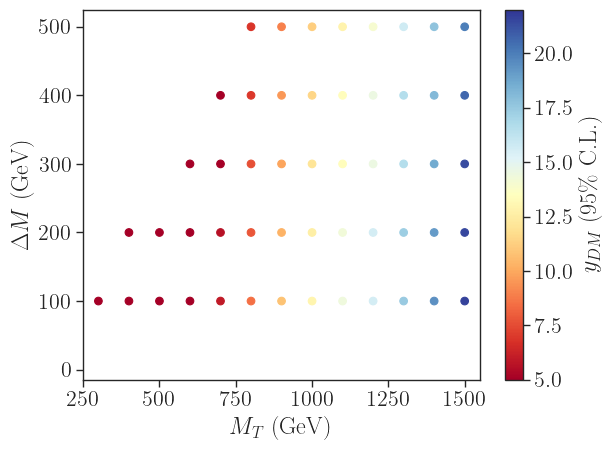

In [25]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}$ (95\% C.L.)')
plt.xlabel(r'$M_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

### Interpolate for a denser grid

In [30]:
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([5.,10.,12.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

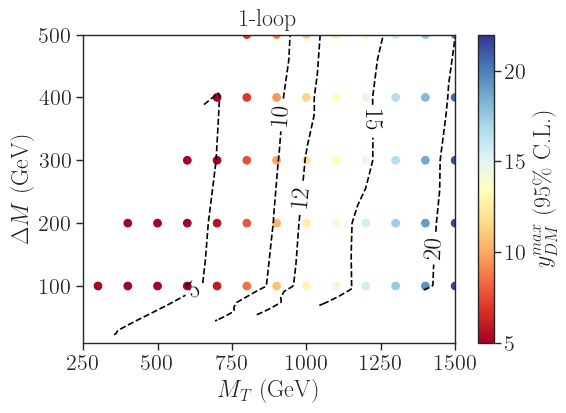

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

In [32]:
recastData[recastData['mPsiT'] ==400.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
2,400.0,200.0,2.082872
3,400.0,300.0,2.229611


In [33]:
recastData[recastData['mPsiT'] ==500.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
4,500.0,300.0,2.419522
5,500.0,400.0,2.573995


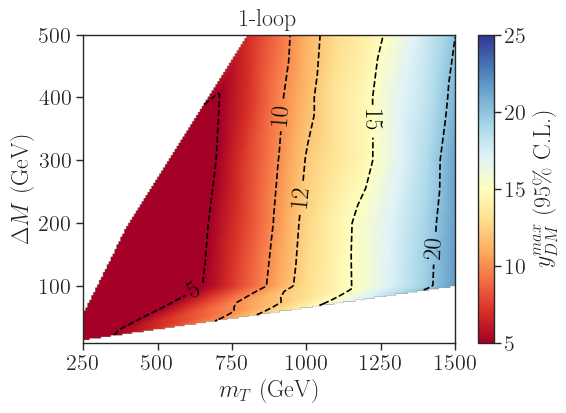

In [35]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

### Save contour curves to text files

In [ ]:
fname = 'CMS_mtt_oneLoop_contours.csv'
saveContours(contoursDict,fname,header='mST_GeV,deltaM_GeV')
